In [1]:
import torch
import torch.optim as optim
from sklearn.model_selection import train_test_split

from src.tools import *
from src.MyRadarNetTools import *
from src.MyRadarNet import *

# import random
# SEED = 42
# random.seed(SEED)
# np.random.seed(SEED)
# torch.manual_seed(SEED)
# torch.cuda.manual_seed(SEED)
# torch.backends.cudnn.deterministic = True
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device is ready: ", device)

Device is ready:  cuda:0


## Импорт файлов

In [46]:
frames_count = 3
x, y, _ = read_Files(frames_count)

<generator object walk at 0x0000022B1FE00C10>


 12%|█▏        | 10/84 [00:12<01:35,  1.29s/it]


KeyboardInterrupt: 

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_dataloader, val_dataloader = make_dataloader(X_train, X_test, y_train, y_test, batch=64)

torch.Size([4624, 3, 11, 61]) torch.Size([4624]) torch.Size([1157, 3, 11, 61]) torch.Size([1157])


In [ ]:
model = MyRadarNet(frames_count)
model.cuda()
n_epochs = 50
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005, eps=1e-08)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.97)

Эпоха: 50;	train loss: 0.596;	valid loss: 0.605;	Точность: 95.85 % 


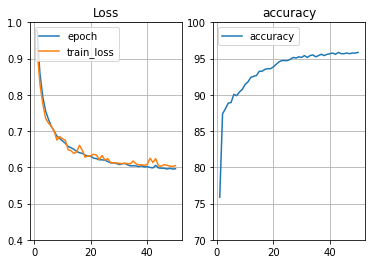

<Figure size 432x288 with 0 Axes>

In [8]:
%matplotlib inline

torch.cuda.empty_cache()
train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, device, n_epochs)

In [42]:
_, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
plot_conf_matrix(predicted_labels, true_labels)

NameError: name 'plot_conf_matrix' is not defined